In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [13]:
data = pd.read_csv('iris.csv')

In [14]:
data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [15]:
%%timeit
data.apply('mean')

1.54 ms ± 17.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
%%timeit
data.apply(np.mean)

1.73 s ± 40.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%%timeit
data.mean(axis=0)

507 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
%%timeit
data.describe().loc['mean']

8.21 ms ± 221 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [112]:
data.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


<AxesSubplot:>

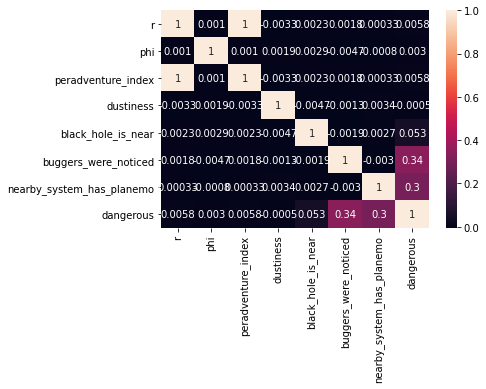

In [115]:
sns.heatmap(data.corr(), annot=True) 

In [98]:
rf = RandomForestClassifier(random_state=0)

In [99]:
x_train = data.loc[:, data.columns != 'class'] 
y_train = data['class']

In [100]:
x_train.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [101]:
y_train.head()

0    transport
1    transport
2    transport
3      fighter
4      fighter
Name: class, dtype: object

In [102]:
params = {
    'n_estimators': range(10, 50, 10),
    'max_depth': range(1, 12, 2),
    'min_samples_leaf': range(1, 7),
    'min_samples_split': range(2, 9, 2)
}

In [103]:
grid_rf = GridSearchCV(rf, params, cv=3, n_jobs=-1)

In [104]:
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [105]:
grid_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [106]:
x_test = pd.read_csv('operative_information.csv')

In [107]:
y_pred = grid_rf.predict(x_test)

In [108]:
pd.Series(y_pred).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [89]:
import zipfile
z = zipfile.ZipFile("testing_y_mush.csv.zip")
txtfiles = z.infolist()
y_true = pd.read_csv(z.open(txtfiles[0], "r", pwd="Cool!Move_forward!".encode('cp850', 'replace')))

<AxesSubplot:>

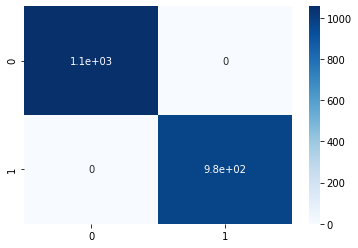

In [95]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues")

<AxesSubplot:>

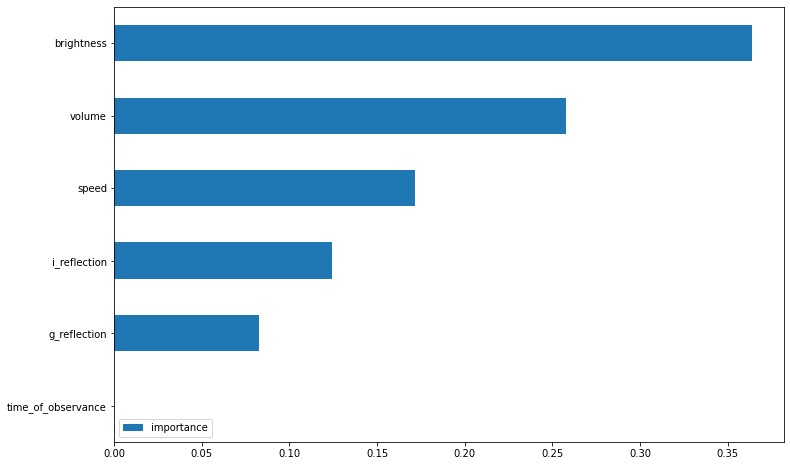

In [109]:
imp = pd.DataFrame(grid_rf.best_estimator_.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))